<a href="https://colab.research.google.com/github/srinijalanda93/SPR_LAB/blob/main/2448526_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print("Upload voice file 1")
uploaded1 = files.upload()
file1 = list(uploaded1.keys())[0]

print("Upload voice file 2")
uploaded2 = files.upload()
file2 = list(uploaded2.keys())[0]

Upload voice file 1


Saving voice1.mp3 to voice1.mp3
Upload voice file 2


Saving voice2.mp3 to voice2.mp3


In [ ]:
y1, sr1 = librosa.load(file1, sr=None)
y2, sr2 = librosa.load(file2, sr=None)

print("Audio 1 length:", len(y1))
print("Audio 2 length:", len(y2))


Audio 1 length: 124280
Audio 2 length: 61886



# ============================
# STEP 3: Extract MFCC features
# ============================

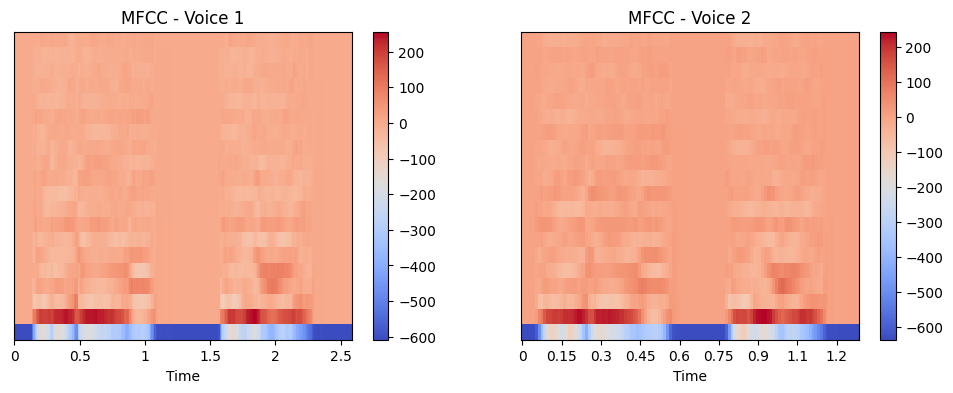

In [ ]:
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=20)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=20)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("MFCC - Voice 1")
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.colorbar()

plt.subplot(1,2,2)
plt.title("MFCC - Voice 2")
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.colorbar()
plt.show()

In [ ]:
from librosa.sequence import dtw

D, wp = dtw(X=mfcc1, Y=mfcc2, metric='euclidean')

# DTW distance
dtw_distance = D[-1, -1]
print("DTW Distance =", dtw_distance)

DTW Distance = 15231.16369366316


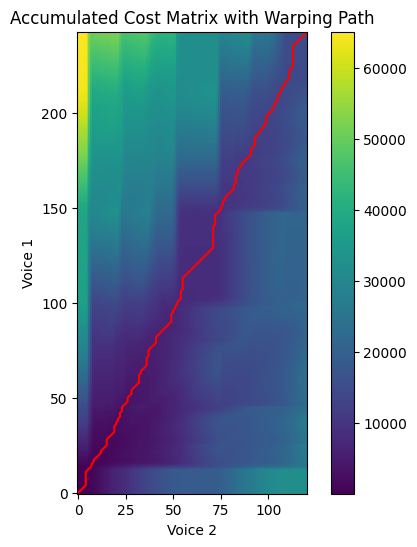

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(D, origin='lower', cmap='viridis', interpolation='nearest')
plt.plot(wp[:, 1], wp[:, 0], color='red')  # warping path
plt.title("Accumulated Cost Matrix with Warping Path")
plt.xlabel("Voice 2")
plt.ylabel("Voice 1")
plt.colorbar()
plt.show()

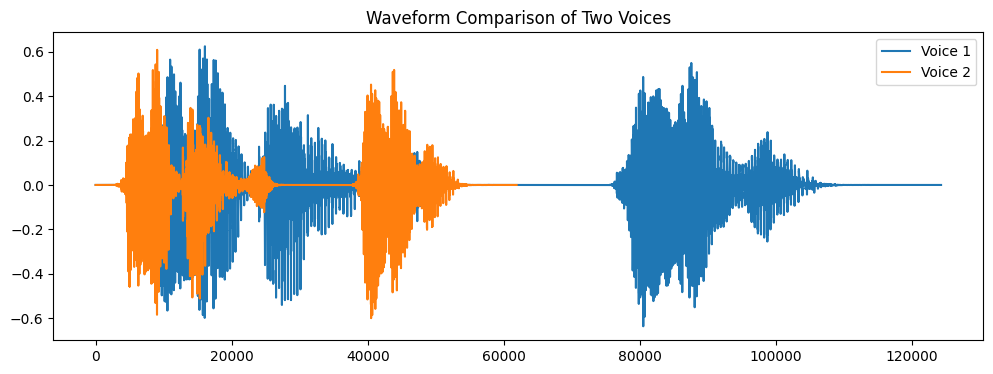

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y1, label="Voice 1")
plt.plot(y2, label="Voice 2")
plt.legend()
plt.title("Waveform Comparison of Two Voices")
plt.show()